# Classification performance

In [ ]:
import os
import pandas as pd
import pickle
from collections import defaultdict

N_SIZES = ["(25,10)", "(50,10)", "(100,10)", "(250,10)", "(500,10)", "(1000,10)", "(-1)", "(-1,-1)"]
PATH = "./experiments"

def load_experiment_data(experiment_path, show_num_experiments_x_axis=False):
    """
    load data from experiments
    """

    exp_dfs = {}
    # for every model
    for model in os.listdir(experiment_path):
        scores_dict = defaultdict(list)
        path_model = os.path.join(experiment_path, model)
        exp_files_files = sorted(os.listdir(path_model), key=lambda x: int(x[1:-1].split(",")[0]))
        
        if show_num_experiments_x_axis:
            iterator = zip(range(len(exp_files_files)), exp_files_files)
        else:
            iterator = zip(N_SIZES, exp_files_files)

        # for every neibghourhood size
        for n_size, n_exp in iterator:
            path_aux_n_exp = os.path.join(experiment_path, model, str(n_exp))
            for eval_file in os.listdir(path_aux_n_exp):
                eval_files = [file for file in os.listdir(os.path.join(path_aux_n_exp, eval_file)) if file.endswith(".pt.pickle") and "eval_scores" in file]

                for score_file in eval_files:
                    scores = pickle.load(open(os.path.join(path_aux_n_exp, eval_file, score_file), "rb"))
                    checkpoint_idx = score_file.removesuffix(".pt.pickle").split("_")[-1]
                    # P, R, F1, AP, AUROC
                    scores_dict["checkpoint"] += [checkpoint_idx]
                    scores_dict["precision"] += [scores[0]]
                    scores_dict["recall"] += [scores[1]]
                    scores_dict["f1"] += [scores[2]]
                    scores_dict["ap"] += [scores[3]]
                    scores_dict["auroc"] += [scores[4]]
                    n_size_aux = int(n_size[1:-1].split(",")[0])
                    if n_size == "(-1)":
                        n_size_aux = 9999
                    elif n_size == "(-1,-1)":
                        n_size_aux = 99999
                    
                    scores_dict["n_size"] += [n_size_aux]
        df = pd.DataFrame(scores_dict)
        df = df.groupby(["checkpoint", "n_size"]).mean(numeric_only=True).reset_index()
        df["n_size"] = df["n_size"].apply(lambda x: f"({x},10)" if x not in (9999,99999) else "(-1)" if x == 9999 else "(-1,-1)")
        exp_dfs[model] = df

    return exp_dfs

experiment_path = "model_checkpoints_final_valid"
exp_dfs = load_experiment_data(os.path.join(PATH, experiment_path), show_num_experiments_x_axis=False)

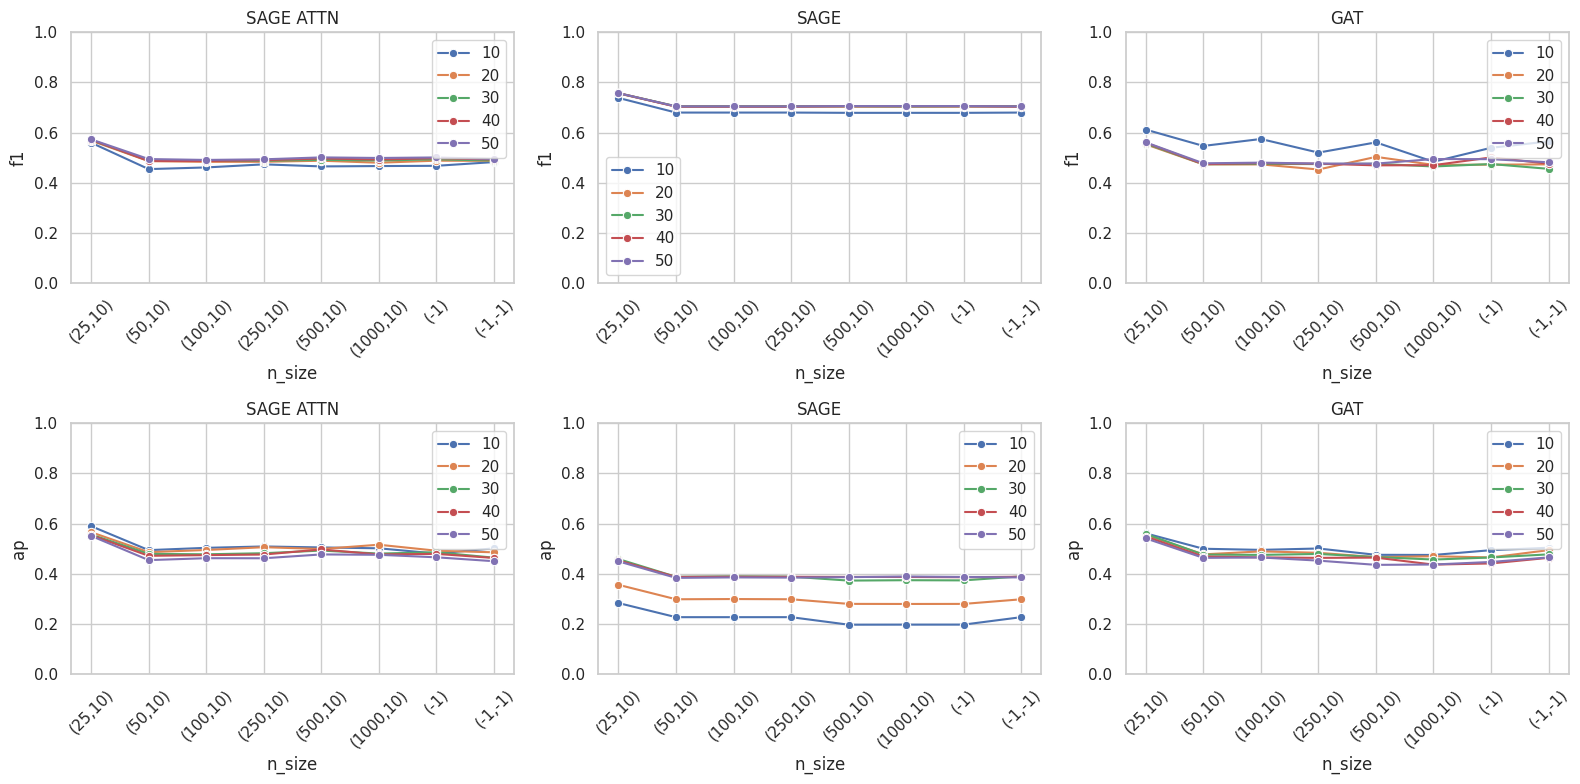

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# metrics = ["precision", "recall", "f1", "ap", "auroc"]
metrics = ["f1", "ap"]
fig, axes = plt.subplots(len(metrics),len(list(exp_dfs.keys())), figsize=(16,8))
for row_axes, metric in zip(axes, metrics):
# for row_axes, metric in zip(axes, metrics):
    for ax, (exp_name, hyper_exp) in zip(row_axes, exp_dfs.items()):
        for checkpoint in hyper_exp["checkpoint"].unique():
            # if int(checkpoint) != 40:
            #     continue
            
            sns.lineplot(data=hyper_exp[hyper_exp["checkpoint"] == checkpoint], y=metric, x="n_size", marker="o", ax=ax, label=checkpoint)
            ax.set_title(exp_name.replace("_", " "))
            ax.tick_params(axis="x", rotation=45)
            ax.set_ylim(0,1)

plt.tight_layout()
plt.show()

In [23]:
df_model = exp_dfs["SAGE"]
# ap
# f1
df_model[((df_model["n_size"] != "(-1)") & (df_model["n_size"] != "(-1,-1)")) & (df_model["checkpoint"] == "30")].sort_values("ap", ascending=False)

,checkpoint,n_size,precision,recall,f1,ap,auroc
16,30,"(25,10)",0.659661,0.888999,0.757189,0.458142,0.701650
18,30,"(100,10)",0.583001,0.891567,0.704731,0.389025,0.721575
19,30,"(250,10)",0.583019,0.891567,0.704744,0.387917,0.720685
17,30,"(50,10)",0.583035,0.891567,0.704756,0.387125,0.720077
21,30,"(1000,10)",0.582130,0.891688,0.704140,0.373649,0.702865
20,30,"(500,10)",0.583372,0.891688,0.705045,0.372099,0.701361


In [24]:
df_model = exp_dfs["GAT"]
# 0.562456
df_model[((df_model["n_size"] == "(-1)") | (df_model["n_size"] == "(-1,-1)")) & (df_model["checkpoint"] == "20")].sort_values("ap", ascending=False)

,checkpoint,n_size,precision,recall,f1,ap,auroc
15,20,"(-1,-1)",0.312870,0.968581,0.472834,0.493683,0.815189
14,20,(-1),0.312117,0.965993,0.471658,0.464641,0.788884


In [25]:
df_model = exp_dfs["SAGE_ATTN"]
# F1
df_model[((df_model["n_size"] != "(-1)") & (df_model["n_size"] != "(-1,-1)")) & (df_model["checkpoint"] == "20")].sort_values("ap", ascending=False)

,checkpoint,n_size,precision,recall,f1,ap,auroc
8,20,"(25,10)",0.404863,0.950900,0.567766,0.565334,0.810272
13,20,"(1000,10)",0.318965,0.965749,0.479399,0.515340,0.825477
11,20,"(250,10)",0.321844,0.969480,0.483105,0.505428,0.823486
12,20,"(500,10)",0.326720,0.959875,0.487339,0.498275,0.818534
10,20,"(100,10)",0.321898,0.967419,0.482900,0.494235,0.816549
9,20,"(50,10)",0.325246,0.959042,0.485599,0.485599,0.812624


In [26]:
df_model = exp_dfs["SAGE_ATTN"]
# F1
df_model[((df_model["n_size"] == "(-1)") | (df_model["n_size"] == "(-1,-1)")) & (df_model["checkpoint"] == "20")].sort_values("ap", ascending=False)

,checkpoint,n_size,precision,recall,f1,ap,auroc
14,20,(-1),0.326840,0.960398,0.487550,0.491444,0.816889
15,20,"(-1,-1)",0.325464,0.966250,0.486733,0.485013,0.811991


# Training Walltime 

In [ ]:
import os
import pandas as pd
import pickle
from collections import defaultdict

N_SIZES = ["(25,10)", "(50,10)", "(100,10)", "(250,10)", "(500,10)", "(1000,10)", "(-1)", "(-1,-1)"]

PATH = "./experiments"
exp_path = "model_checkpoints_final_time"
exp_dfs = {}
for model in os.listdir(os.path.join(PATH, exp_path)):
    scores_dict = defaultdict(list)
    model_path = os.path.join(PATH, exp_path, model)
    gat_exp_files = sorted(os.listdir(model_path), key=lambda x: int(x[1:-1].split(",")[0]))
    for n_size, n_exp in zip(N_SIZES, gat_exp_files):
        path_aux_n_exp = os.path.join(PATH, exp_path, model, str(n_exp))
        for eval_file in os.listdir(path_aux_n_exp):
            eval_files = [file for file in os.listdir(os.path.join(path_aux_n_exp, eval_file)) if file.endswith(".pickle") and "time" in file]
            for score_file in eval_files:
                train_time = pickle.load(open(os.path.join(path_aux_n_exp, eval_file, score_file), "rb"))
                
                scores_dict["time"] += [train_time]
                n_size_aux = int(n_size[1:-1].split(",")[0])
                if n_size == "(-1)":
                    n_size_aux = 9999
                elif n_size == "(-1,-1)":
                    n_size_aux = 99999
                
                scores_dict["n_size"] += [n_size_aux]
    df = pd.DataFrame(scores_dict)
    df = df.groupby(["n_size"]).mean(numeric_only=True).reset_index()
    df["n_size"] = df["n_size"].apply(lambda x: f"({x},10)" if x not in (9999,99999) else "(-1)" if x == 9999 else "(-1,-1)")
    exp_dfs[model] = df

In [51]:
exp_dfs["GAT"]

,n_size,time
0,"(25,10)",25.881932
1,"(50,10)",58.780700
2,"(100,10)",44.013541
3,"(250,10)",46.065577
4,"(500,10)",45.085347
5,"(1000,10)",48.433552
6,(-1),46.927973
7,"(-1,-1)",45.729081


In [52]:
exp_dfs["SAGE"]

,n_size,time
0,"(25,10)",16.782976
1,"(50,10)",21.467327
2,"(100,10)",70.186012
3,"(250,10)",68.491625
4,"(500,10)",67.284124
5,"(1000,10)",66.132714
6,(-1),67.758717
7,"(-1,-1)",64.708183


In [53]:
exp_dfs["SAGE_ATTN"]

,n_size,time
0,"(25,10)",20.665000
1,"(50,10)",36.044225
2,"(100,10)",60.254081
3,"(250,10)",60.737604
4,"(500,10)",58.778550
5,"(1000,10)",57.307279
6,(-1),58.450157
7,"(-1,-1)",57.445856
